# **Andrel John M. Pantanoza**

# **BSCS 3A**

# **Midterm Exam**

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# **Load Dataset**

In [ ]:
data = pd.read_csv('googleplaystore.csv')

# **1. Data Cleaning and Preparation**

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].str.replace('M', 'e+6').str.replace('k', 'e+3').replace('Varies with device', 0)
data['Size'] = pd.to_numeric(data['Size'])
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
data['Type'] = data['Type'].replace('Free', 0)
data['Type'] = data['Type'].replace('Paid', 1)
content_rating_mapping = {'Everyone': 1, 'Teen': 2, 'Everyone 10+': 3, 'Mature 17+': 4, 'Adults only 18+': 5, 'Unrated': 6}
data['Content Rating'] = data['Content Rating'].map(content_rating_mapping)
data['Price'] = data['Price'].str.replace('$', '').replace('Free', '0').astype(float)
data = data[~data['Rating'].isin([6, 7, 8])]

# **2. Exploratory Data Analysis (EDA)**

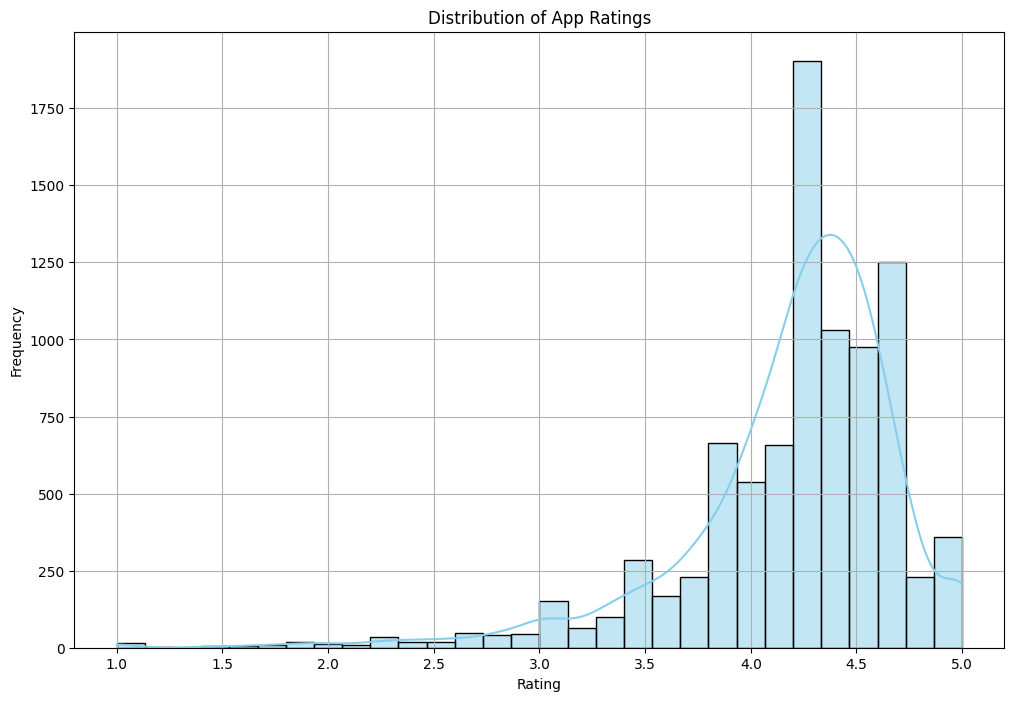

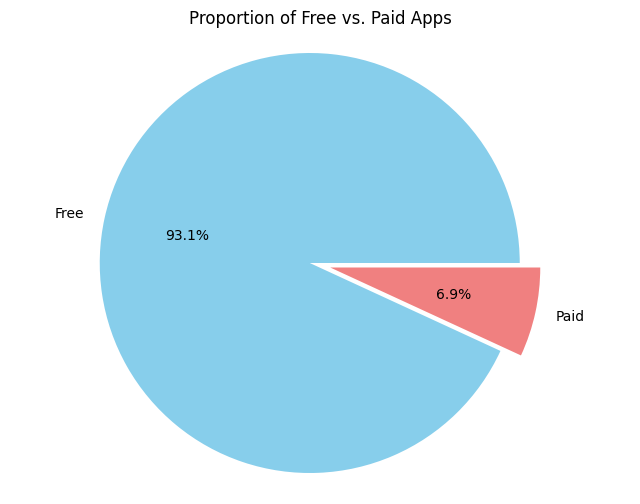

<ipython-input-11-42e94f1c087d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index[:10], palette='viridis')


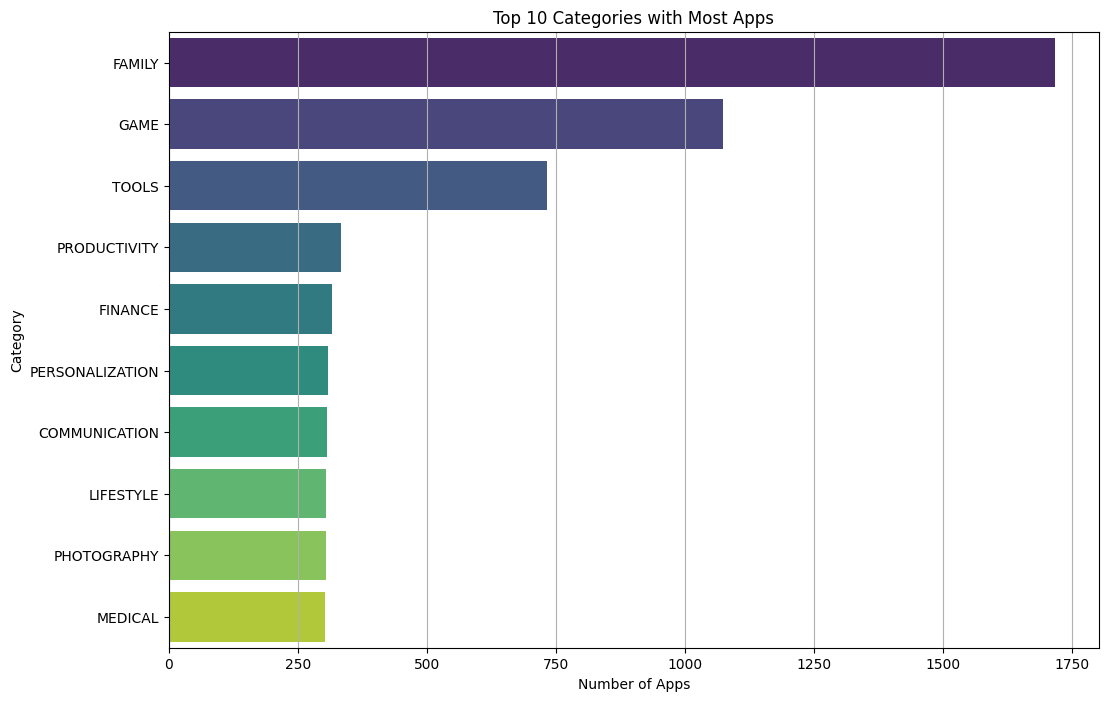

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
labels = ['Free', 'Paid']
data['Type'].replace({0: 'Free', 1: 'Paid'}).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=labels, explode=(0, 0.1))
plt.title('Proportion of Free vs. Paid Apps')
plt.axis('equal')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Categories with Most Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

# **3. Category Analysis**

In [ ]:
category_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Category with the Highest Average Rating:", category_rating.idxmax(), ", Average rating:", round(category_rating.max(), 2))

category_reviews = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print("Category with the Most Reviews:", category_reviews.idxmax(), ", Total reviews:", category_reviews.max())

category_apps_count = data['Category'].value_counts()
print("Category with the Most Apps:", category_apps_count.idxmax(), ", Total apps:", category_apps_count.max())

Category with the Highest Average Rating: EVENTS , Average rating: 4.44
Category with the Most Reviews: GAME , Total reviews: 1415533878
Category with the Most Apps: FAMILY , Total apps: 1717


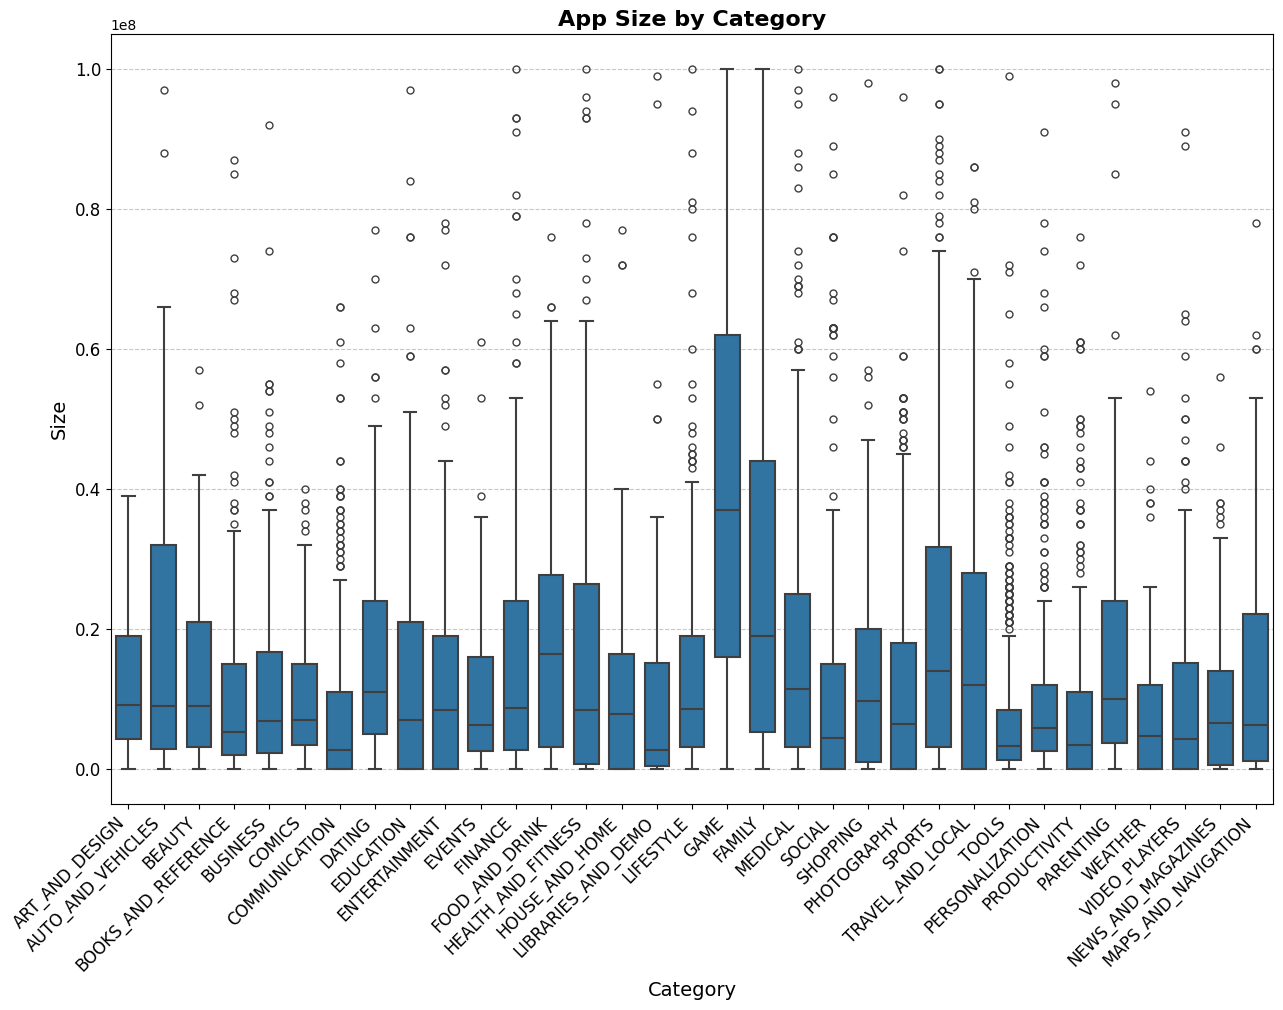

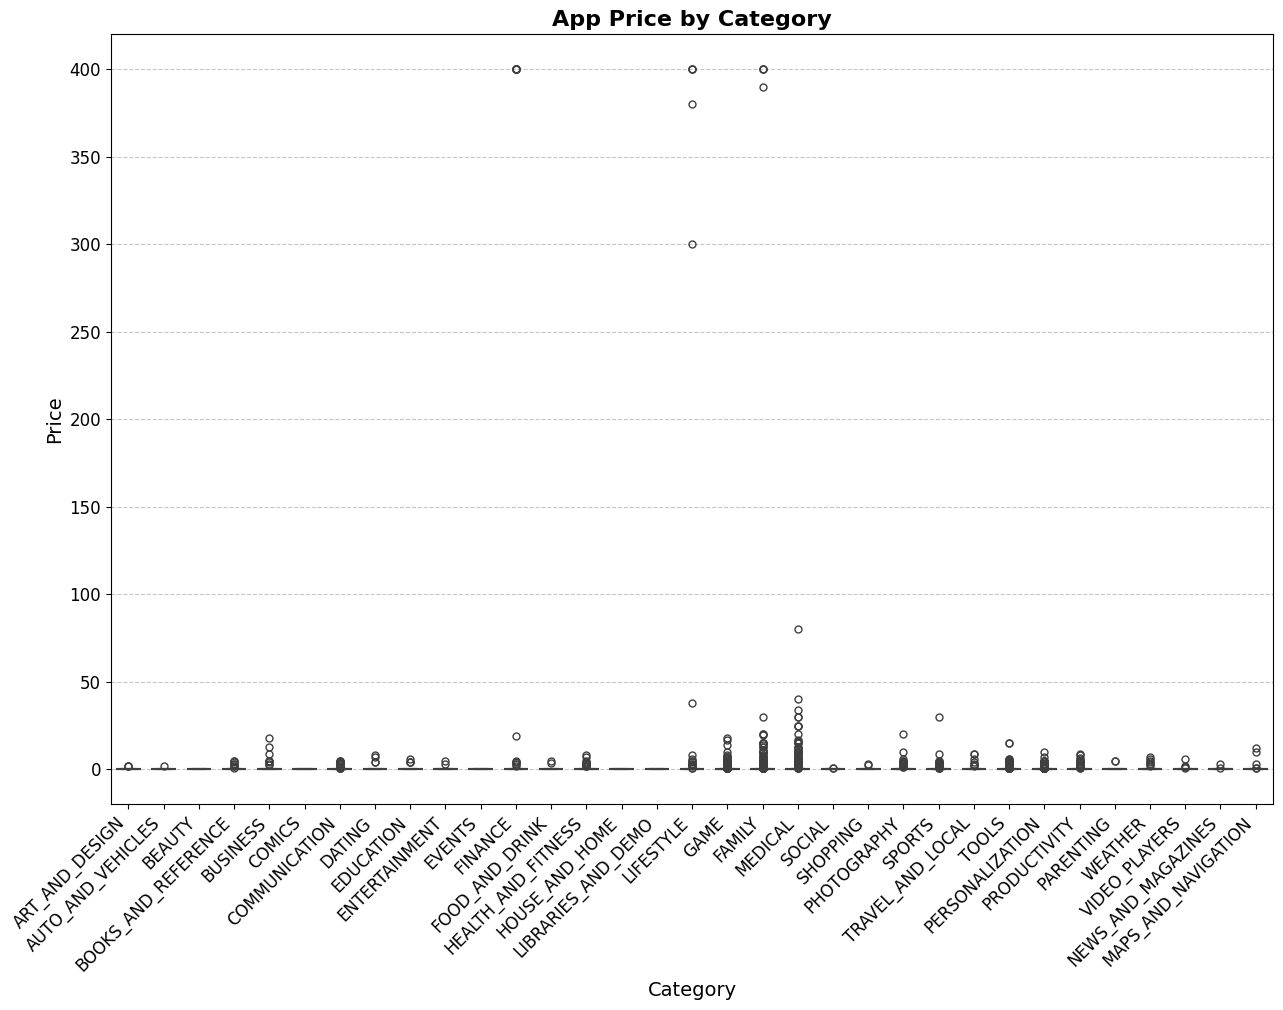

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Category', y='Size', data=data, width=0.7, linewidth=1.5, fliersize=5)
plt.title('App Size by Category', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='Category', y='Price', data=data, width=0.7, linewidth=1.5, fliersize=5)
plt.title('App Price by Category', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **4. Rating Prediction Model**

In [ ]:
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
X = data[features].fillna(0)  # Handling missing values by filling with 0
y = data['Rating'].fillna(data['Rating'].mean())  # Handling missing values in target variable by filling with mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2719180345797263


# **5. Trend Analysis**

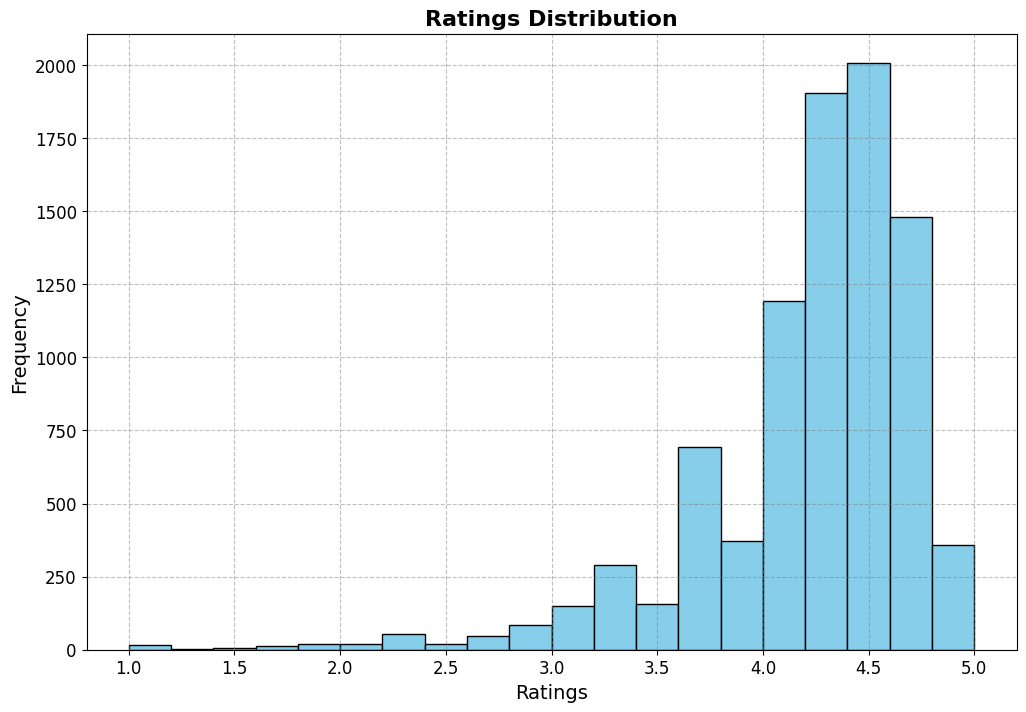

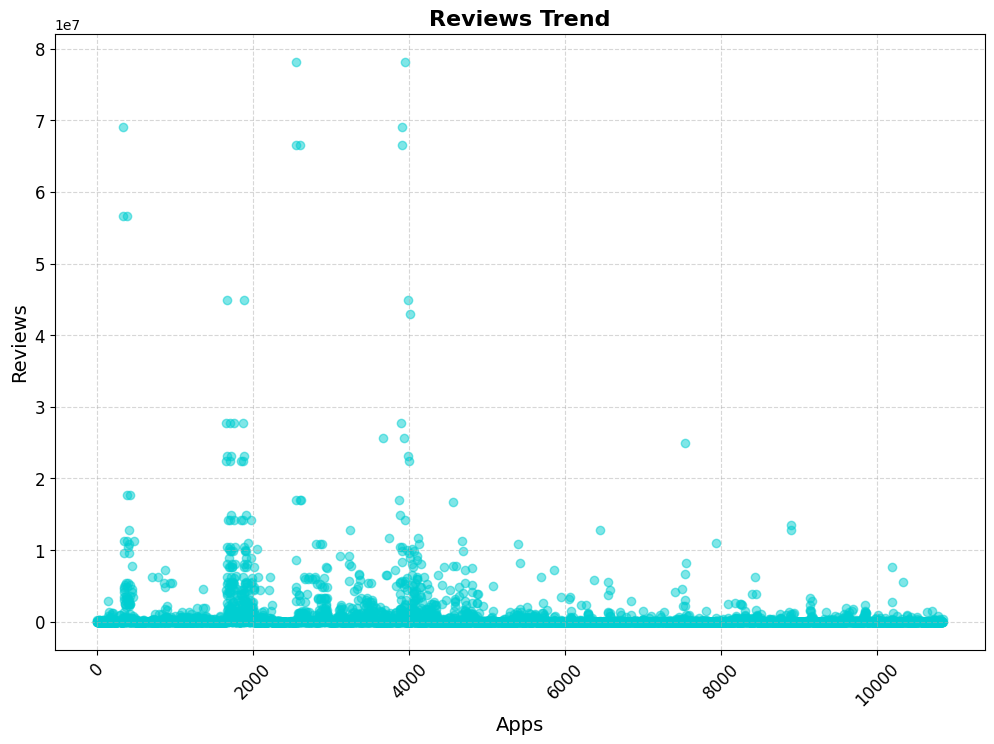

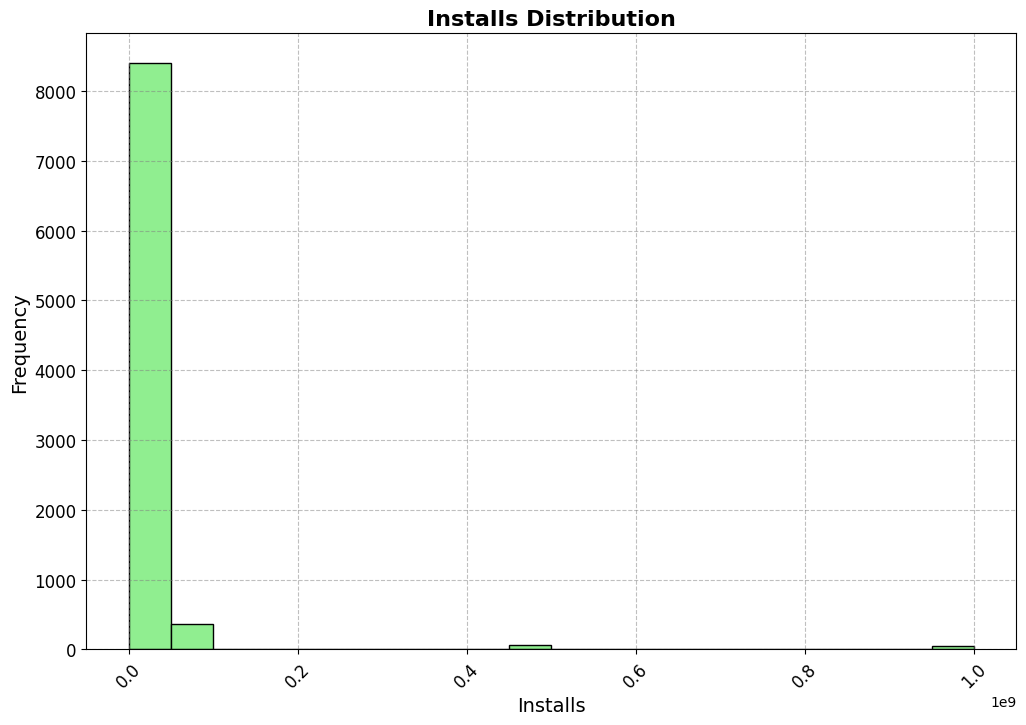

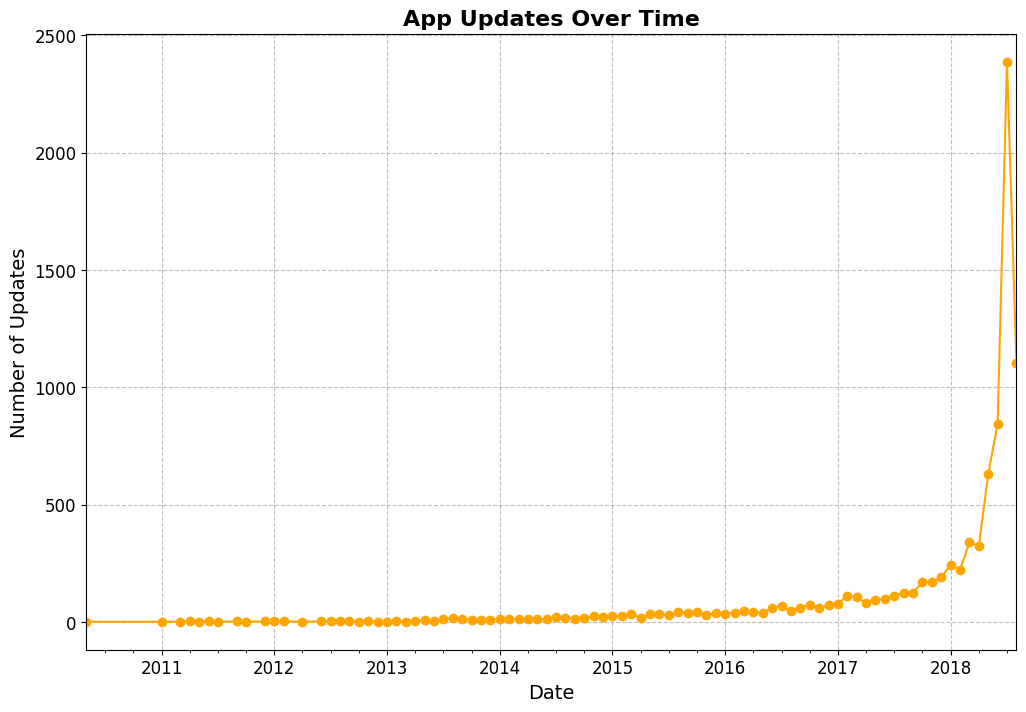

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(data['Rating'], bins=20, edgecolor='black', color='skyblue')
plt.title('Ratings Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, color='gray', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(data.index, data['Reviews'], color='darkturquoise', alpha=0.5)
plt.title('Reviews Trend', fontsize=16, fontweight='bold')
plt.xlabel('Apps', fontsize=14)
plt.ylabel('Reviews', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(12, 8))
plt.hist(data['Installs'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Installs Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, color='gray', linestyle='--', alpha=0.5)
plt.show()

data['Last Updated'] = pd.to_datetime(data['Last Updated'])

plt.figure(figsize=(12, 8))
data.groupby(data['Last Updated'].dt.to_period('M')).size().plot(color='orange', marker='o')
plt.title('App Updates Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Updates', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, color='gray', linestyle='--', alpha=0.5)
plt.show()

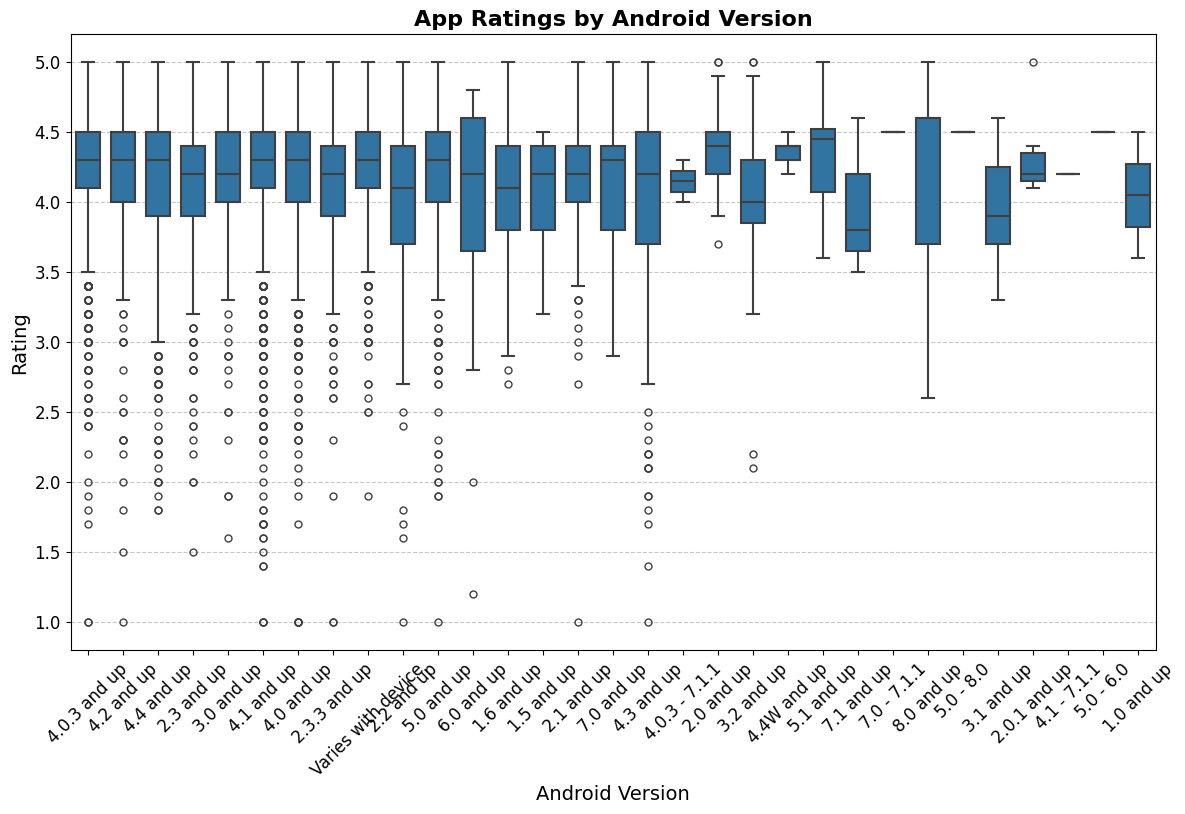

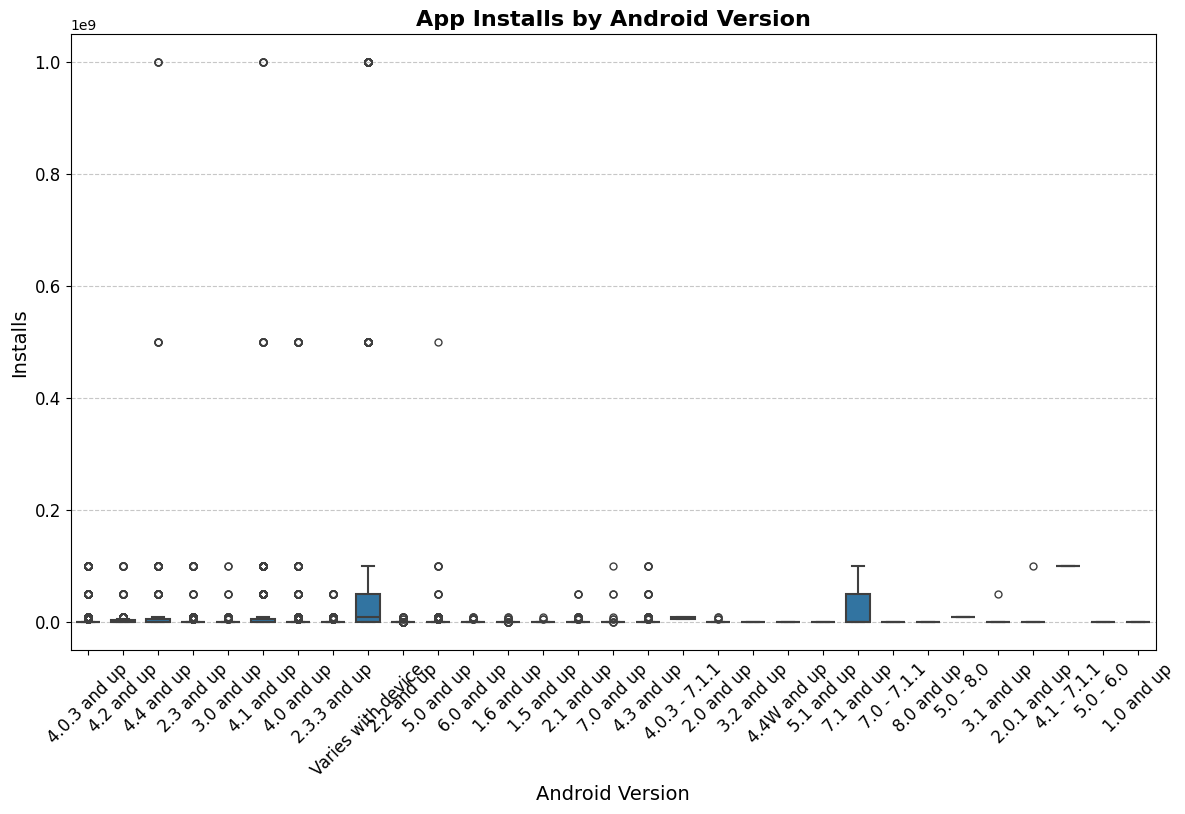

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Android Ver', y='Rating', data=data, width=0.7, linewidth=1.5, fliersize=5)
plt.title('App Ratings by Android Version', fontsize=16, fontweight='bold')
plt.xlabel('Android Version', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Android Ver', y='Installs', data=data, width=0.7, linewidth=1.5, fliersize=5)
plt.title('App Installs by Android Version', fontsize=16, fontweight='bold')
plt.xlabel('Android Version', fontsize=14)
plt.ylabel('Installs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **6. Impact of Reviews on Ratings**

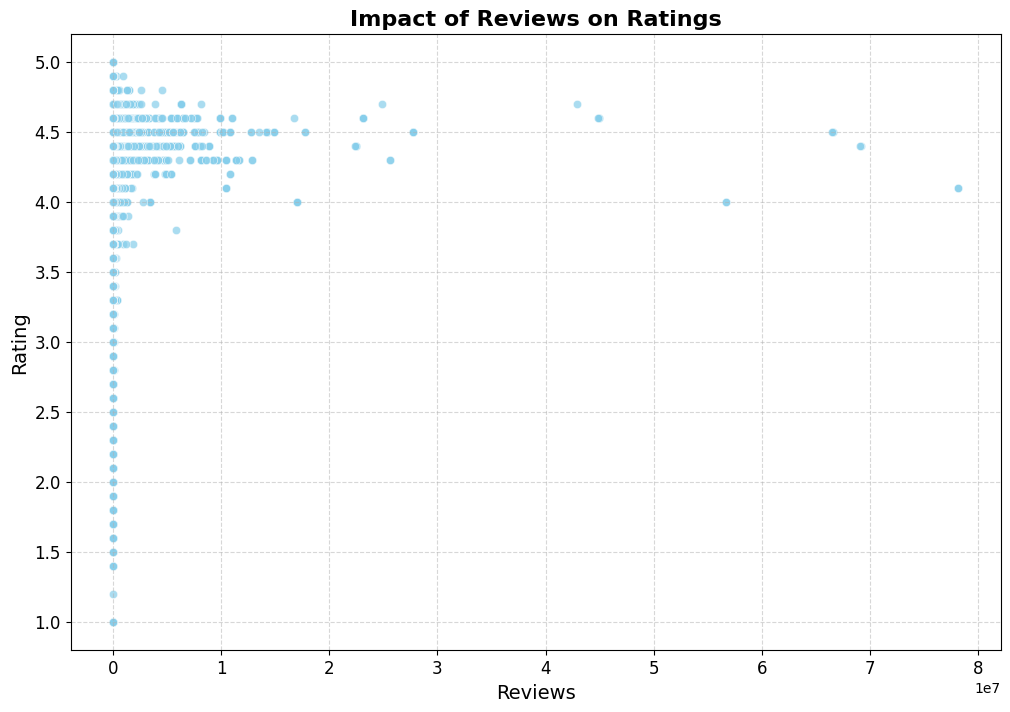

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Reviews', y='Rating', data=data, alpha=0.7, color='skyblue')
plt.title('Impact of Reviews on Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Reviews', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()